In [15]:
import cellular_automata as ca
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np

In [2]:
GENERATIONS = 100
ROWS = COLS = 101
ORIGIN = (COLS // 2, ROWS // 2)
PHI = 1000
CANCER_INIT_POSITIONS = [(ORIGIN[0], ORIGIN[1]), (ORIGIN[0] + 1, ORIGIN[1]), 
                         (ORIGIN[0] - 1, ORIGIN[1]), (ORIGIN[0], ORIGIN[1] - 1), 
                         (ORIGIN[0], ORIGIN[1] + 1)]
K1, K2, K3, K4 = 0.74, 0.2, 0.4, 0.4
RHO = 3.85
TAU = 7

In [ ]:
#initial positions
cancer_pos1 = [(ROWS-1,COLS-1),(0,0),(0,COLS-1),(ROWS-1,0),ORIGIN[0],ORIGIN[1]]
cancer_pos2 = [(int(ROWS/4),int(COLS/4)),(0,0),(int(ROWS/4*3),int(COLS/4*3)),(int(ROWS/4*3),int(COLS/4)),(int(ROWS/4),int(COLS/4*3))]
cancer_pos3 = [(int(ROWS/4),int(COLS/4)),(0,0),(int(ROWS/4*3),int(COLS/4*3)),(int(ROWS/4*3),int(COLS/4)),(int(ROWS/4),int(COLS/4*3))]


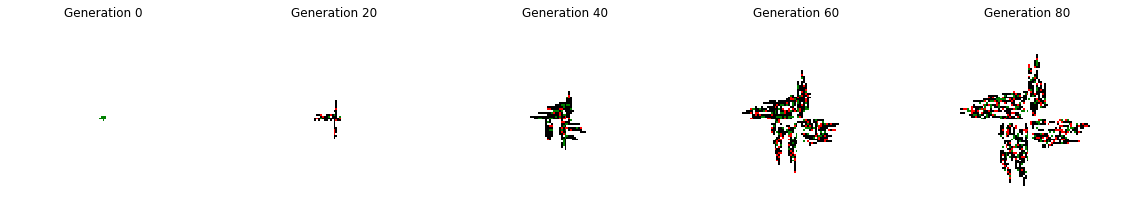

<Figure size 1440x576 with 0 Axes>

In [3]:
history = ca.plot_simulate_tumor_growth(TAU, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)

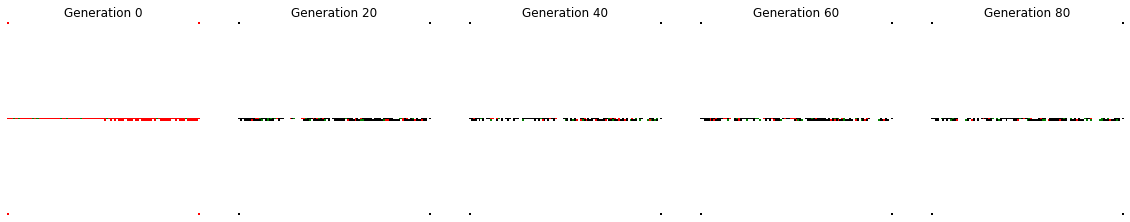

<Figure size 1440x576 with 0 Axes>

In [5]:
cancer_pos1 = [(ROWS-1,COLS-1),(0,0),(0,COLS-1),(ROWS-1,0),ORIGIN[0],ORIGIN[1]]

history = ca.plot_simulate_tumor_growth(TAU, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, cancer_pos1, ORIGIN)

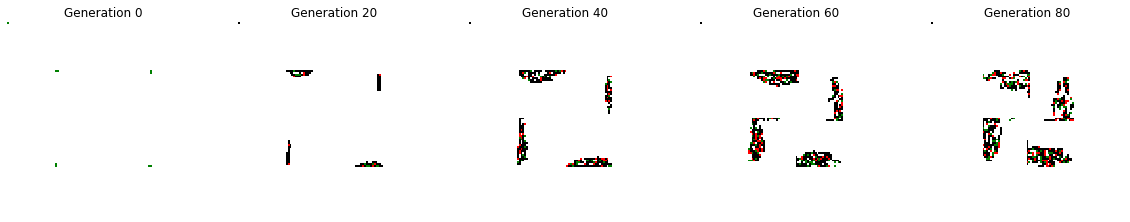

<Figure size 1440x576 with 0 Axes>

In [11]:
cancer_pos2 = [(int(ROWS/4),int(COLS/4)),(0,0),(int(ROWS/4*3),int(COLS/4*3)),(int(ROWS/4*3),int(COLS/4)),(int(ROWS/4),int(COLS/4*3))]

history = ca.plot_simulate_tumor_growth(TAU, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, cancer_pos2, ORIGIN)

In [12]:
POSs = [cancer_pos1,cancer_pos2]
POS_histories = []
POS_clusters = []

for pos in POSs:
    history, Ms = ca.simulate_tumor_growth_with_clusters(TAU, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, pos, ORIGIN)
    POS_histories.append(history)
    
    indiv_clusters = [ca.find_clusters(M, ROWS,COLS) for M in Ms]
    POS_clusters.append([len(indiv_clusters[i]) for i in range(GENERATIONS)])

In [13]:
Nc_histories = [[history[g]['Nc'] for g in range(GENERATIONS)] for history in POS_histories]

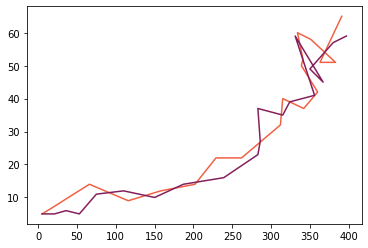

In [17]:
palette = sns.color_palette('rocket_r', len(POSs))

for i,(history, cluster) in enumerate(zip(Nc_histories,POS_clusters)):
    slice_history = history[::5]
    slice_cluster = cluster[::5]
    # if i < 5:
    plt.plot(slice_history,slice_cluster, color=palette[i])

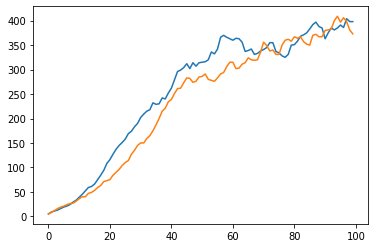

In [19]:
for history in Nc_histories:
    plt.plot(history)